In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math
import random
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from numpy.linalg import matrix_power
from itertools import cycle
import sounddevice as sd

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

C:\Users\Mykola\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Importujeme potrebné knižnice a nastavíme štýl zobrazovania grafov

In [3]:
fn_wav = os.path.join('..', 'Mykola', 'bakalarka','sounds02', 'sine-440.wav')
x, Fs = librosa.load(fn_wav, sr=None)

N = len(x)
Ts = 1/Fs
t = np.dot(np.arange(0, N-1) , Ts)
rohdB = -10
roh = pow(10,(rohdB/20));
xPeak = max(abs(x)); 
xN = (roh/xPeak) * x;


V tejto časti kódu vypočítame veľkosť signálu (N) a časový krok (Ts). Premenná t obsahuje časovú os. Hodnoty rohdB a roh sa používajú na normalizáciu amplitúdy signálu x. Premenná xPeak obsahuje maximálnu hodnotu amplitúdy signálu x, zatiaľ čo xN obsahuje normalizovaný signál.

In [4]:
w1 = np.random.rand(N, 1)
w2 = np.random.rand(N, 1)

rohdB = -10
roh = pow(10,(rohdB/20))
wPeak1 = max(abs(w1))
w1N = (roh/wPeak1) * w1
w1N = w1N.flatten()
wPeak2 = max(abs(w2))
w2N = (roh/wPeak2) * w2
w2N = w2N.flatten()

V tejto časti kódu vygenerujeme dva náhodné šumové signály (w1 a w2) a normalizujeme ich amplitúdy. Na normalizáciu amplitúd sa používajú hodnoty rohdB a roh. Premenné wPeak1 a wPeak2 obsahujú maximálne amplitúdy príslušných šumových signálov, zatiaľ čo w1N a w2N obsahujú normalizované šumové signály.

In [9]:
y1 = xN + w1N; y2 = xN + w2N;
y3 = y1 + y2; y4 = y1 - y2 ;

V tejto časti kódu vytvoríme dva zmiešané signály (y1 a y2) pridaním signálu xN k príslušným šumovým signálom (w1N a w2N). Vytvoríme tiež dva ďalšie signály (y3 a y4) sčítaním a odčítaním signálov y1 a y2.

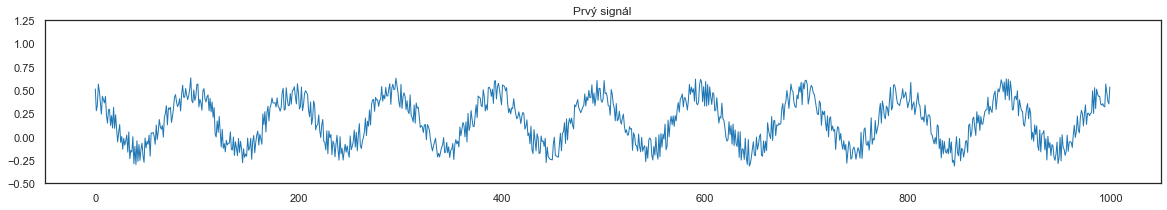

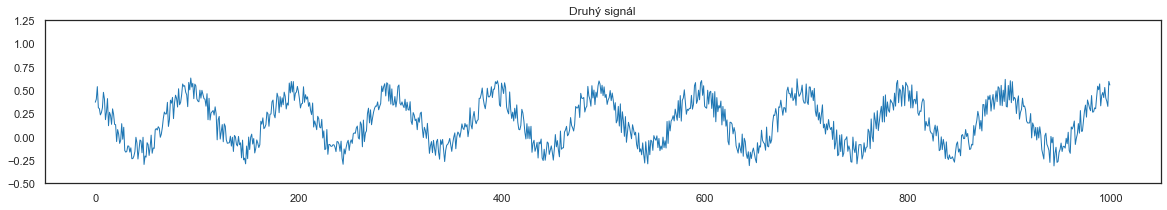

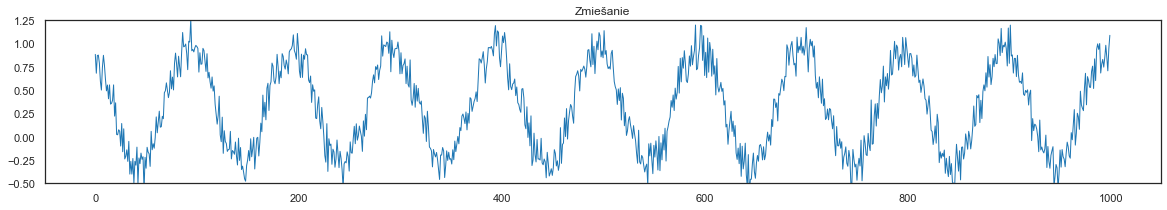

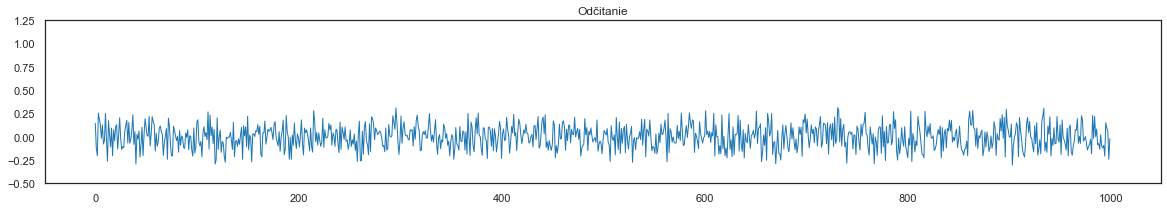

In [16]:
pd.Series(y1[30000:31000]).plot(figsize=(20,3),
                  lw=1,
                  ylim=(-0.5, 1.25),
                  title='Prvý signál',
                  color=color_pal[0])
plt.show()
pd.Series(y2[30000:31000]).plot(figsize=(20,3),
                  lw=1,
                  ylim=(-0.5, 1.25),
                  title='Druhý signál',
                  color=color_pal[0])
plt.show()
pd.Series(y3[30000:31000]).plot(figsize=(20,3),
                  lw=1,
                  ylim=(-0.5, 1.25),
                  title='Zmiešanie',
                  color=color_pal[0])
plt.show()
pd.Series(y4[30000:31000]).plot(figsize=(20,3),              
                  lw=1,
                  ylim=(-0.5, 1.25),
                  title='Odčitanie',
                  color=color_pal[0])
plt.show()

Grafy zobrazujú amplitúdové charakteristiky štyroch zvukových signálov generovaných kódom. Každý graf zobrazuje 1000 vzoriek z generovaného signálu (od vzorky 30000 po vzorku 31000).